## Importing libraries

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Reshape
#from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image
from tensorflow.keras.utils import load_img,img_to_array
import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

### Loading blemished , Noise and blurred data, and merging them. Also, adding 1000 images which are not damaged.

In [10]:
X_train = []

In [11]:
file = open('noise_train.pkl','rb')

noise_train = pickle.load(file)
file.close()

In [12]:
file = open('blur_train.pkl','rb')

blur_train = pickle.load(file)
file.close()

In [15]:
file = open('blemished_train.pkl','rb')

blemished_train = pickle.load(file)
file.close()

In [16]:
X_train.extend(noise_train)

In [17]:
X_train.extend(blur_train)

In [18]:
X_train.extend(blemished_train)

In [19]:
del noise_train
del blur_train
del blemished_train

In [20]:
file = open('nochange_train.pkl','rb')

nochange_train = pickle.load(file)
file.close()

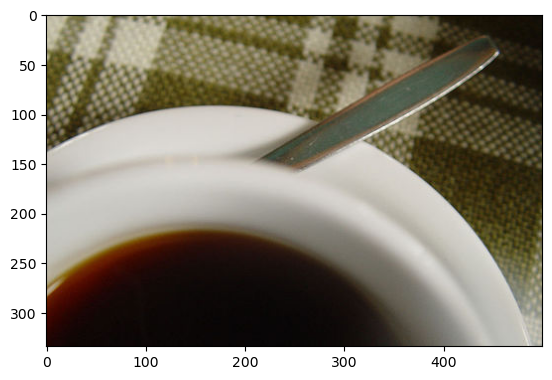

In [21]:
plt.imshow(nochange_train[999])

In [22]:
X_train.extend(nochange_train)

In [23]:
file = open('imagenet_subset.pkl','rb')

y_train = pickle.load(file)


file.close()

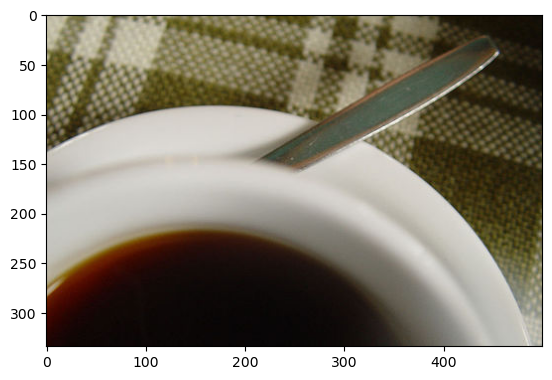

In [24]:
plt.imshow(y_train[29999])

In [25]:
X_test = []


In [26]:
file = open('noise_test.pkl','rb')

noise_test = pickle.load(file)

file.close()

In [27]:
file = open('blur_test.pkl','rb')

blur_test = pickle.load(file)

file.close()

In [28]:
file = open('blemished_test.pkl','rb')

blemished_test = pickle.load(file)

file.close()

In [29]:
X_test.extend(noise_test)

In [30]:


X_test.extend(blur_test)

In [31]:
X_test.extend(blemished_test)

In [32]:
del noise_test
del blur_test
del blemished_test

In [33]:
file = open('imagenet_testset.pkl','rb')

y_test = pickle.load(file)


file.close()

In [34]:
X_val = []

In [35]:
file = open('noise_val.pkl','rb')

noise_val = pickle.load(file)

file.close()

In [36]:
file = open('blur_val.pkl','rb')

blur_val = pickle.load(file)


file.close()

In [39]:
file = open('gola_val.pkl 2','rb')

blemished_val = pickle.load(file)


file.close()

In [40]:
X_val.extend(noise_val)

In [41]:
X_val.extend(blur_val)

In [42]:
X_val.extend(blemished_val)

In [43]:

file = open('imagenet_valset.pkl','rb')

y_val = pickle.load(file)

file.close()

In [44]:
del noise_val
del blur_val
del blemished_val

In [ ]:
plt.imshow(X_test[2999])


In [ ]:
plt.imshow(y_test[2999])

In [ ]:
plt.imshow(X_val[2999])

In [ ]:
import cv2
import pandas as pd

In [45]:
def resize_images(img, new_width, new_height):
    size = (new_width, new_height)
    resized_img = cv2.resize(img, size)
    return resized_img

In [46]:
resized_img_Xtrain = [resize_images(img, new_width=80, new_height=80) for img in X_train]
resized_img_Ytrain = [resize_images(img, new_width=80, new_height=80) for img in y_train]
resized_img_Xtest = [resize_images(img, new_width=80, new_height=80) for img in X_test]
resized_img_Ytest = [resize_images(img, new_width=80, new_height=80) for img in y_test]
resized_img_Xval = [resize_images(img, new_width=80, new_height=80) for img in X_val]
resized_img_Yval = [resize_images(img, new_width=80, new_height=80) for img in y_val]

In [47]:
resized_img_Ytrain = [resize_images(img, new_width=80, new_height=80) for img in y_train]
file = open('img_y_train.pkl','wb')

pickle.dump(resized_img_Ytrain,file)

file.close()

In [48]:
file = open('img_x_train.pkl','wb')

pickle.dump(resized_img_Xtrain,file)

file.close()

file = open('img_x_test.pkl','wb')

pickle.dump(resized_img_Xtest,file)

file.close()
file = open('img_y_test.pkl','wb')

pickle.dump(resized_img_Ytest,file)

file.close()
file = open('img_x_val.pkl','wb')

pickle.dump(resized_img_Xval,file)

file.close()
file = open('img_y_val.pkl','wb')

pickle.dump(resized_img_Yval,file)

file.close()

In [ ]:
plt.imshow(resized_img_Xval[0])

In [ ]:
# for i in range(len(resized_img_Yval)):
#   if resized_img_Yval[i].shape[-1] != 3:
#     pass

#   print(resized_img_Yval[i].shape)

In [ ]:
# get low resolution images for the training set
# train_x_px = []
train_x = np.array(resized_img_Ytrain)
train_x = train_x/255.0
test_x = np.array(resized_img_Ytest)
test_x = test_x/255.0
val_x = np.array(resized_img_Yval)
val_x = val_x/255.0
# for i in range(np.array(train_x).shape[0]):
#   temp = pixalate_image(train_x[i,:,:,:])
#   train_x_px.append(temp)

train_x_px = np.array(resized_img_Xtrain)
train_x_px = train_x_px/255.0


# get low resolution images for the validation set
# val_x_px = []

# for i in range(val_x.shape[0]):
#   temp = pixalate_image(val_x[i,:,:,:])
#   val_x_px.append(temp)

test_x_px = np.array(resized_img_Xtest)
test_x_px = test_x_px/255.0

val_x_px = np.array(resized_img_Xval)
val_x_px = val_x_px/255.0

In [ ]:
encoder = Sequential()

encoder.add(Flatten(input_shape=[80,80,3]))
encoder.add(Dense(9600,activation="relu"))
encoder.add(Dense(4800,activation="relu"))
encoder.add(Dense(2400,activation="relu"))
encoder.add(Dense(1200,activation="relu"))
encoder.add(Dense(600,activation="relu"))


decoder = Sequential()

decoder.add(Dense(1200,input_shape=[600],activation='relu'))
decoder.add(Dense(2400,activation='relu'))
decoder.add(Dense(4800,activation='relu'))
decoder.add(Dense(9600,activation='relu'))
decoder.add(Dense(80*80*3,activation='sigmoid',input_shape = [9600]))
decoder.add(Reshape([80,80,3]))

simple_autoencoder = Sequential([encoder,decoder])

simple_autoencoder.compile(optimizer='adam', loss='mse')


In [ ]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')

simple_autoencoder.fit(train_x_px, train_x,
            epochs=50,
            batch_size=32,
            shuffle=True,
            validation_data=(val_x_px, val_x),
            callbacks=[early_stopper]
            )

In [ ]:
Input_img = Input(shape=(80, 80, 3))  
# Reshape_img = Reshape((80, 80), input_shape=(128,128))(Input_img)    
#encoding architecture
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2))(x2)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)

# decoding architecture
x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
decoded = Conv2D(3, (3, 3), padding='same')(x1)

autoencoder = Model(Input_img, decoded)
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.5, nesterov=True)
autoencoder.compile(optimizer=sgd, loss='mse')

In [ ]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')

autoencoder.fit(train_x_px, train_x,
            epochs=50,
            batch_size=32,
            shuffle=True,
            validation_data=(val_x_px, val_x),
            callbacks=[early_stopper]
            )

In [ ]:
predictions = autoencoder.predict(test_x_px)

In [ ]:
predictions.shape

In [ ]:
n = 5
plt.figure(figsize= (20,10))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(test_x_px[i+10])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(predictions[i+10])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
# encoder = tf.keras.models.Sequential()

# encoder.add(tf.keras.layers.Conv2D(32, 3, strides=1, padding='same', activation='relu', input_shape=(128,128,3)))
# encoder.add(tf.keras.layers.MaxPooling2D(2, strides=2))

# encoder.add(tf.keras.layers.Conv2D(64, 3, strides=1, padding='same', activation='relu'))
# encoder.add(tf.keras.layers.MaxPooling2D(2, strides=2))

# encoder.add(tf.keras.layers.Conv2D(128, 3, strides=1, padding='same', activation='relu'))
# encoder.add(tf.keras.layers.MaxPooling2D(2, strides=2))

# encoder.summary()


In [ ]:
# decoder = tf.keras.models.models.Sequential()

# decoder.add(tf.keras.models.layers.Conv2DTranspose(128, 3, strides=1, padding='same', activation='relu', input_shape= (16,16,128)))
# decoder.add(tf.keras.models.layers.2D(2))

# decoder.add(tf.keras.models.layers.Conv2D(16, 3, strides=1, padding='same', activation='relu'))
# decoder.add(tf.keras.models.layers.UpSampling2D(2))

# decoder.add(tf.keras.models.layers.Conv2D(3, 3, strides=1, padding='same', activation='relu'))
# decoder.add(tf.keras.models.layers.UpSampling2D(2))

# decoder.summary()

In [ ]:
# import numpy as np
# from keras.layers import UpSampling2D,Conv2DTranspose
# from keras.models import Sequential
# model = Sequential()
# model.add(Conv2DTranspose(2, 3, input_shape=(3,3,1)))

# x = np.arange(9).reshape(1,3,3,1)
# x[0,:,:,0]  # this is what x looks like initially

# y = model.predict(x)
# y[0,:,:,0] # this is what it looks like after upsampling

In [ ]:
# import numpy as np
# from keras.layers import UpSampling2D,Conv2DTranspose
# from keras.models import Sequential
# model = Sequential()
# # model.add(Conv2DTranspose(2, 3, input_shape=(3,3,1)))
# model.add(UpSampling2D(size=(2,2), input_shape=(3,3,1)))

# x = np.arange(9).reshape(1,3,3,1)
# x[0,:,:,0]  # this is what x looks like initially

# y = model.predict(x)
# y[0,:,:,0] # this is what it looks like after upsampling

In [ ]:
df = pd.DataFrame(a_e.history)

In [ ]:
df.plot()